In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import optimize as opt

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

In [12]:
data

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
...,...,...
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655


<Axes: title={'center': 'Height (inch.) distribution'}, ylabel='Frequency'>

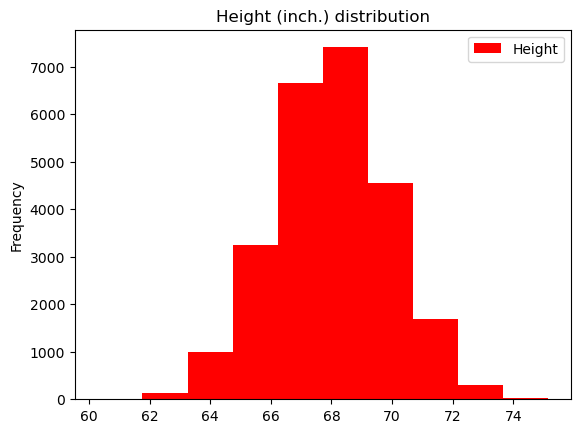

In [18]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

In [19]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


<Axes: title={'center': 'Weight (Pounds) distribution'}, ylabel='Frequency'>

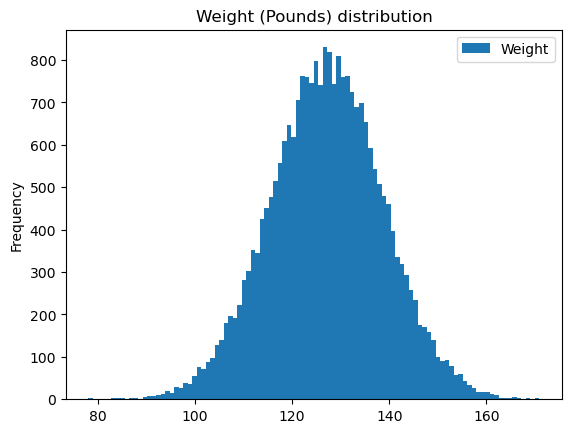

In [33]:
data.plot.hist(y='Weight',  title='Weight (Pounds) distribution', bins=100)

In [21]:

def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [22]:

data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

In [23]:
data

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581
...,...,...,...
24996,69.50215,118.0312,17.178982
24997,64.54826,120.1932,20.281866
24998,64.69855,118.2655,19.863971


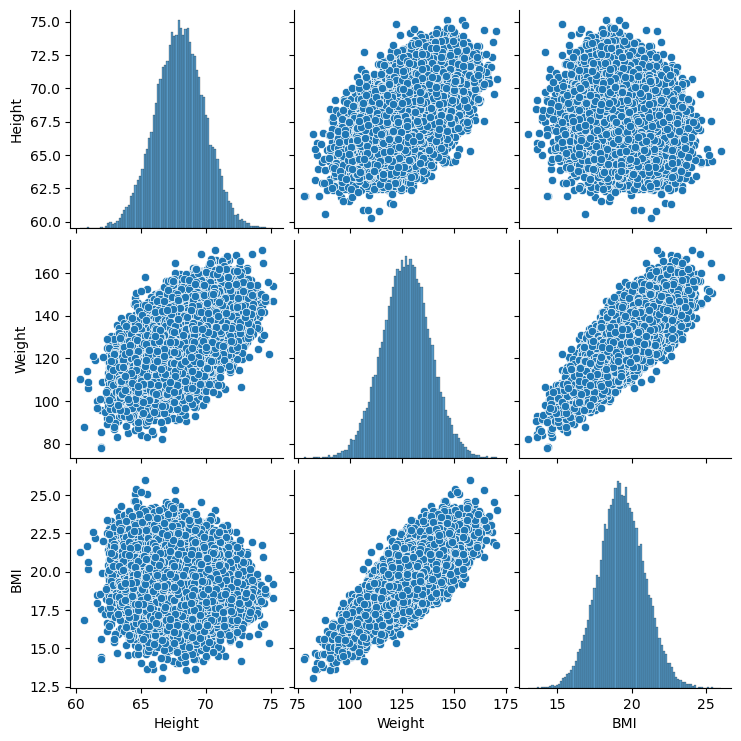

In [24]:
sns.pairplot(data)

In [25]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >=150:
        return 3
    else:
        return 2

data['weight_category'] = data['Weight'].apply(weight_category)

Text(0, 0.5, 'Рост')

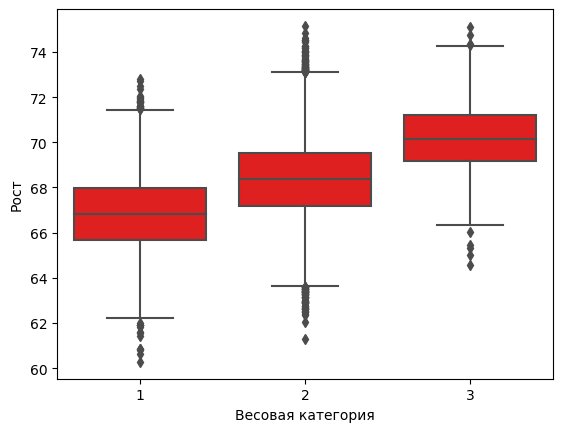

In [26]:
sns.boxplot(data=data,color = 'red', y= 'Height', x = 'weight_category')
plt.xlabel("Весовая категория")
plt.ylabel("Рост")

In [27]:
def plot_data():
    data.plot(x='Weight', y = 'Height', kind='scatter')
    plt.xlabel("Вес")
    plt.ylabel("Рост")
    plt.title("Зависимость роста от веса")

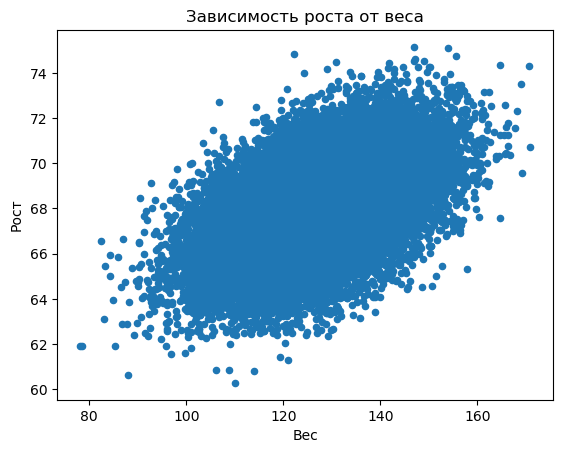

In [28]:
plot_data()


In [35]:

def get_error(w):
    return ((data['Height'] - (w[0] + w[1] * data['Weight']))**2).sum(axis=0)

In [51]:
def plot_line(w):
    x=np.linspace(50,200)
    y=w[0]+w[1]*x
    plt.plot(x,y,color='red')

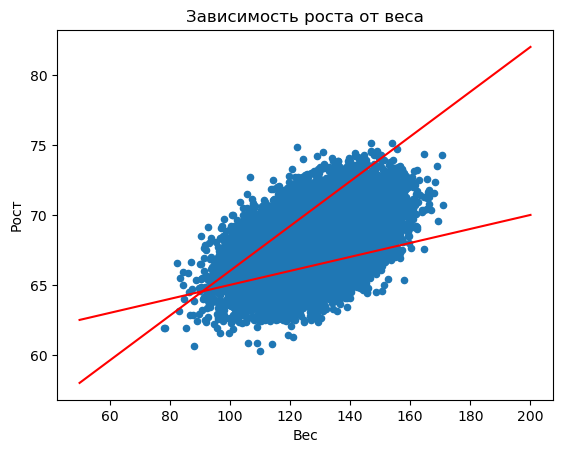

In [53]:
plot_data()
plot_line([60,0.05])
plot_line([50,0.16])

In [54]:
def plot_line(x, w0, w1, color):
    y= w0 + w1 * x
    plt.plot(x, y, color=color)

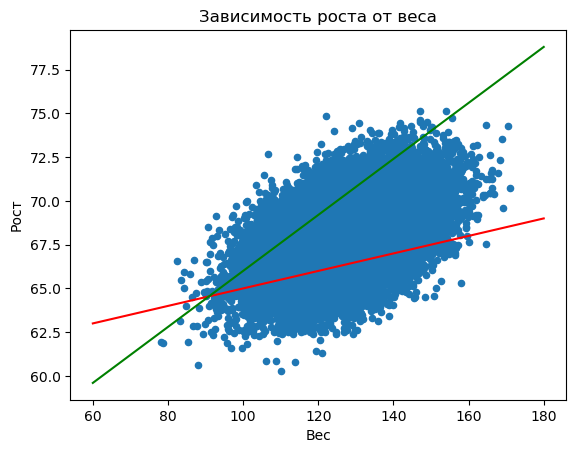

In [59]:
x = np.linspace(60, 180)
plot_data()
plot_line(x, 60, 0.05, color='red')
plot_line(x, 50, 0.16, color='green')

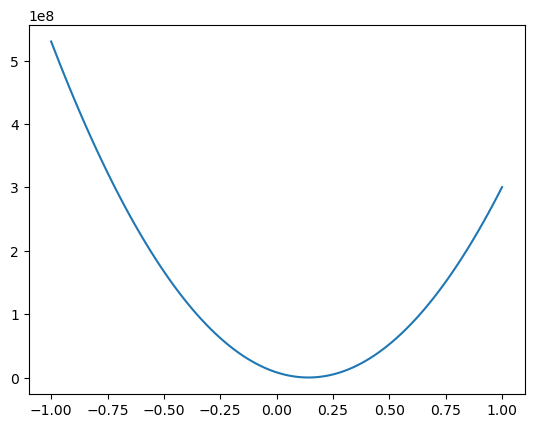

In [60]:
x=np.linspace(-1,1,num=100)
y=[]
for i in x:
    y.append(get_error((50,i)))
plt.plot(x,y)

Text(0, 0.5, 'error')

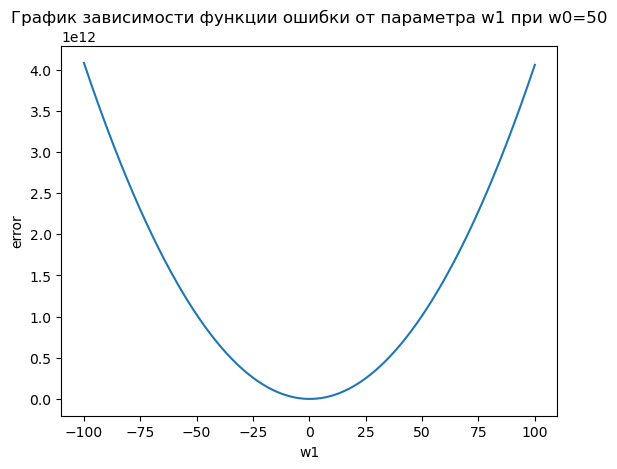

In [61]:
w0 = 50
w1 = np.linspace(-100, 100, 500)
y = [get_error([w0, w1_one]) for w1_one in w1]
plt.plot(w1, y)
plt.title('График зависимости функции ошибки от параметра w1 при w0=50')
plt.xlabel('w1')
plt.ylabel('error')

In [64]:
def get_error2(w1):
    return get_error((50,w1))
w1=opt.minimize_scalar(get_error2,bounds=(-5,5))

In [65]:
w1

 message: Solution found.
 success: True
  status: 0
     fun: 79512.217286995
       x: 0.14109203728834374
     nit: 6
    nfev: 6

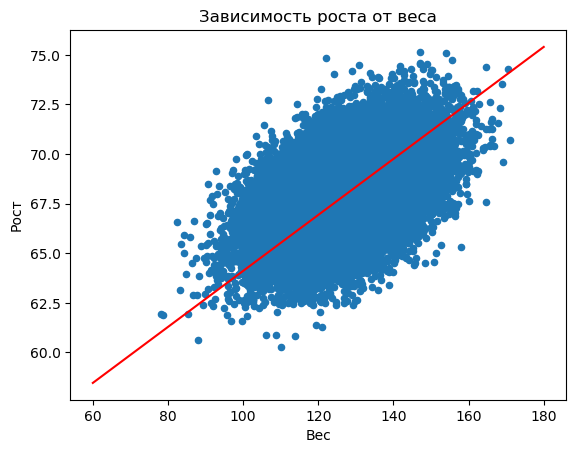

In [67]:
plot_data()
x = np.linspace(60, 180)
plot_line(x, 50, w1.x, color='red')

In [68]:

w0_const = 50
w1_opt = opt.minimize_scalar(lambda w1: get_error([w0_const,w1]),bounds=(-5,5)).x
print ("w0 и w1:", w0_const, w1_opt)
print('error', get_error([w0_const,w1_opt]))

w0 и w1: 50 0.14109203728834374
error 79512.217286995


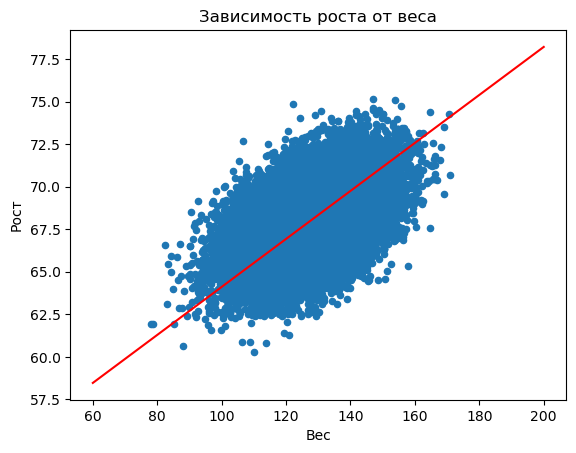

In [69]:
x = np.linspace(60, 200)
plot_data()
plot_line(x, w0_const, w1_opt, color='red')

In [70]:

from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'Z')

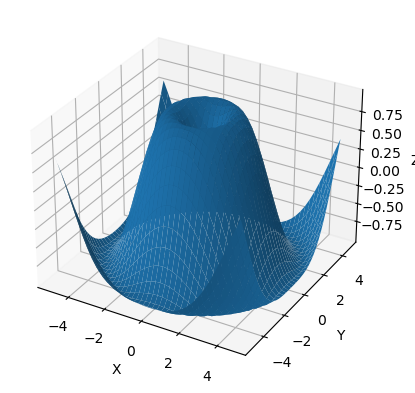

In [79]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
#ax = fig.gca(projection='3d') # get current axis
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#plt.show()

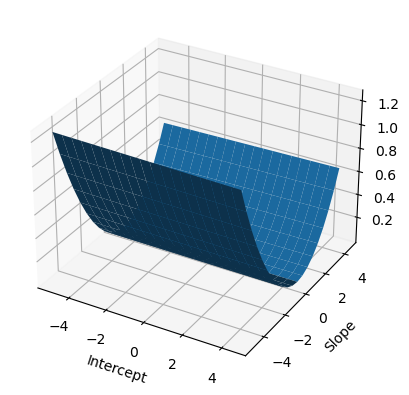

In [109]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
#ax = fig.gca(projection='3d') # get current axis
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(X, Y)

XY=np.stack((X,Y),axis=-1)
XY=np.reshape(XY,(-1,2))
V=np.ones(XY.size)
Z = np.reshape(np.array([get_error(x) for x in XY]),X.shape)
#Z = np.array([get_error([X[i,j], Y[i,j]]) for i in np.arange(X.shape[0]) for j in np.arange(X.shape[1])])
#Z.shape = X.shape

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [110]:
def get_error_broadcasting(w0, w1):
    sum = 0
    for i in range(1,len(data.index)):
         sum += (data['Height'][i] - (w0 + w1 * data['Weight'][i]))**2
    return sum

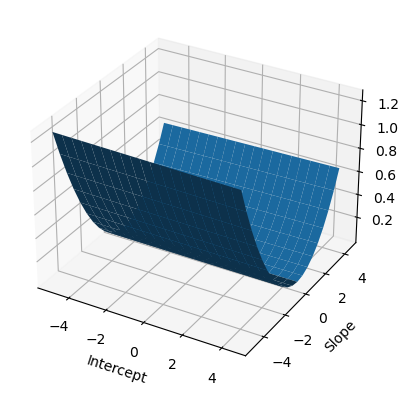

In [112]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
#ax = fig.gca(projection='3d') # get current axis
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(X, Y)
Z = get_error_broadcasting(X, Y)
#Z = np.array([get_error([X[i,j], Y[i,j]]) for i in np.arange(X.shape[0]) for j in np.arange(X.shape[1])])
#Z.shape = X.shape

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [119]:
w=opt.minimize(get_error,(0,0),method='L-BFGS-B',bounds=((-100,100),(-5,5)))

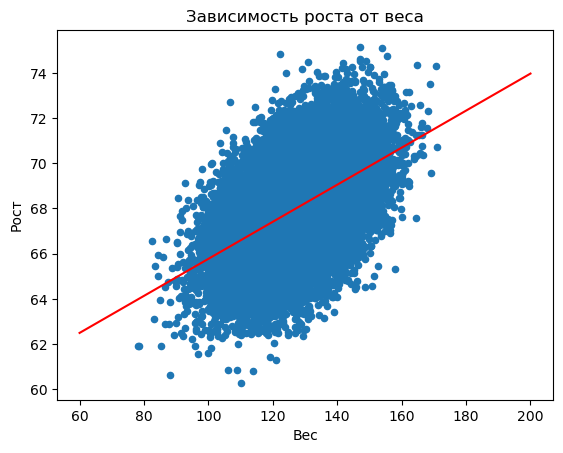

In [120]:
x = np.linspace(60, 200)
plot_data()
plot_line(x, w.x[0], w.x[1], color='red')

In [121]:
x = np.array([[1, 2], [3, 4]])

# Obtain array of square of each element in x
squarer = lambda t: t ** 2
squares = np.array([squarer(xi) for xi in x])

In [122]:
squares

array([[ 1,  4],
       [ 9, 16]])